**Identification and Segmentation of Nuclei From Images of Cells: A Deep Learning Approach**

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import count_nuclei as cn

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Set some parameters
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH = '/Users/albertocomin/zeisshack2019/nuclei-dataset-2018/stage1_train/'
TEST_PATH = '/Users/albertocomin/zeisshack2019/nuclei-dataset-2018/stage1_test/'

# seed = 42
# random.seed = seed
# np.random.seed = seed

In [25]:
# Get and resize train images and masks
x_train, y_train, x_test, y_test, X_test, sizes_test = cn.load_nuclei_image_data(TRAIN_PATH, TEST_PATH, IMG_WIDTH, IMG_HEIGHT)

Getting and resizing train images and masks ... 


100%|██████████| 670/670 [01:56<00:00,  5.75it/s]

Getting and resizing test images ... 



100%|██████████| 65/65 [00:01<00:00, 54.19it/s]


Done!

x_train (536, 128, 128, 3)
x_test (134, 128, 128, 3)
y_train (536, 128, 128, 1)
y_test (134, 128, 128, 1)


*Step 4: Visualize Training Data*

/Users/albertocomin/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/albertocomin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


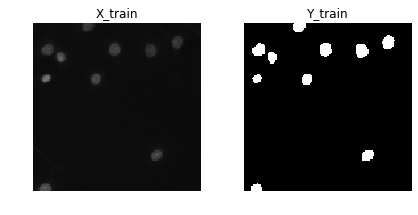

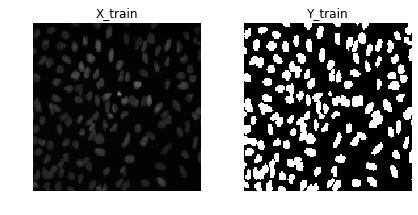

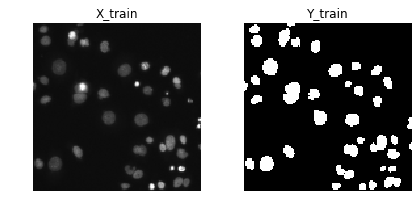

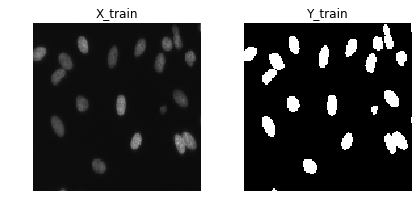

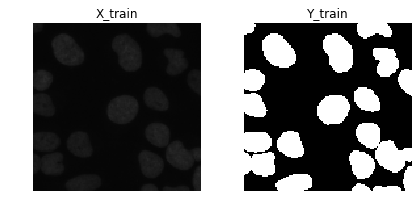

In [4]:
cn.plotTrainData(x_train, y_train)

*Step 6: Evaluate Convolutional Network*

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 16)    528       
__________

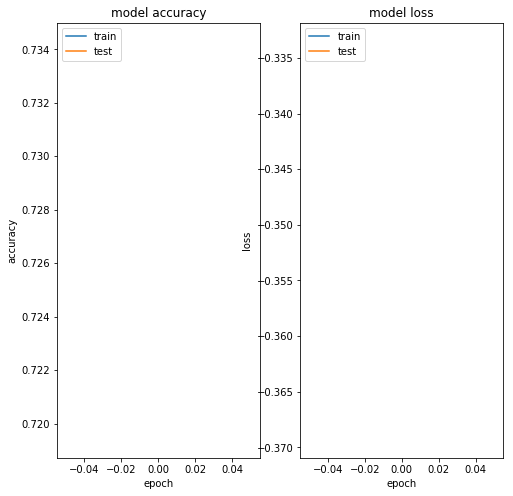

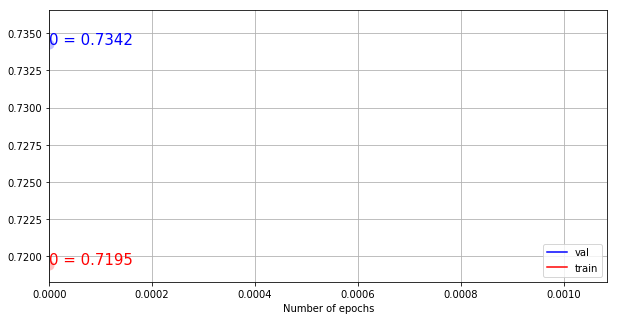

In [5]:
modelY = cn.SIMPLE(x_train, y_train,x_test,y_test, no_epochs=1) # no_epochs changed from 30 to 1

*Step 7: Display Result and Compare to Training Data*

134/134 [==============================] - 3s 25ms/step


/Users/albertocomin/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/albertocomin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


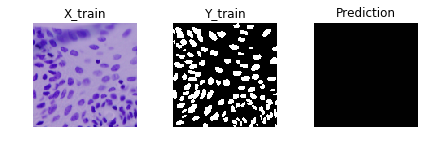

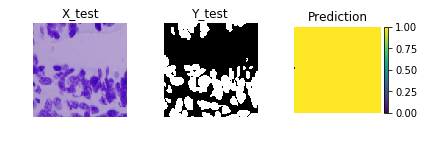

In [6]:
cn.plotPredictions(x_train,y_train,x_test,y_test,modelY)

*Step 8: Evaluate Convolutional Network with U-Net Architecture*

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (

Train on 536 samples, validate on 134 samples
Epoch 1/1
536/536 [==============================] - 108s 202ms/step - loss: 0.4392 - mean_iou: 0.4142 - acc: 0.8266 - val_loss: 0.2811 - val_mean_iou: 0.4446 - val_acc: 0.8967

Epoch 00001: val_loss improved from inf to 0.28113, saving model to model-dsbowl2018-2.h5


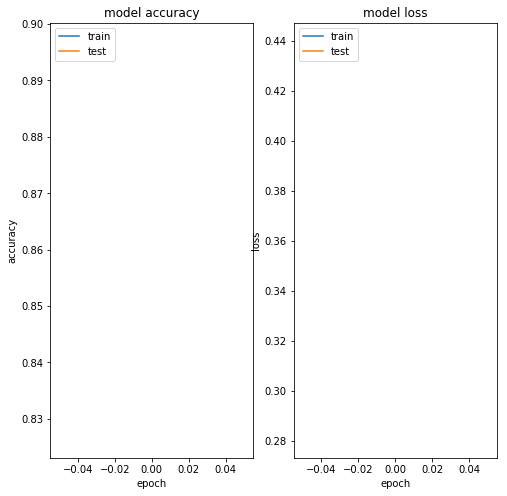

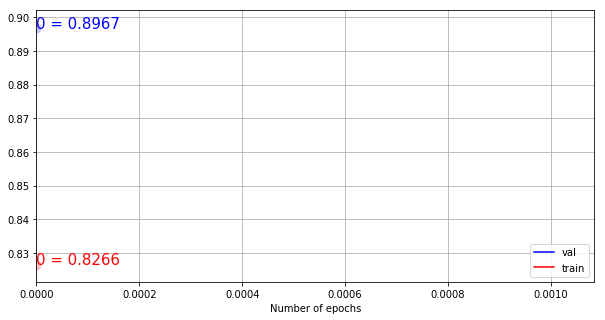

In [7]:
modelZ = cn.UNET(x_train, y_train,x_test,y_test, no_epochs=1) # changed no_epochs from 40 to 1

*Step 9: Display Result and Compare to Training Data*

134/134 [==============================] - 8s 59ms/step


/Users/albertocomin/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/albertocomin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


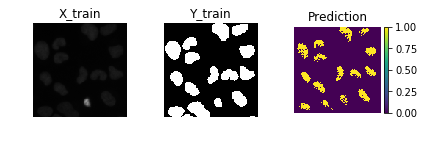

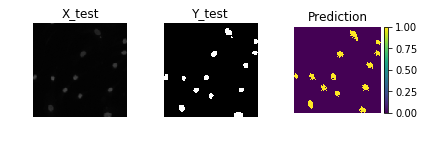

In [8]:
cn.plotPredictions(x_train,y_train,x_test,y_test,modelZ)

*Step 10: Save and Submit Results*

In [9]:
submission_df = cn.submit_results(TEST_PATH)

100%|██████████| 65/65 [00:00<00:00, 96.80it/s]


In [27]:
cn.saveResults(modelY, X_test, sizes_test)

65/65 [==============================] - 3s 45ms/step
Results Saved


In [22]:
preds_test = modelY.predict(X_test, verbose=1)
sizes_test = X_test.shape
# Create list of upsampled test masks
preds_test_upsampled = []

for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))
new_test_ids = []
rles = []
for n, id_ in enumerate(test_ids):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))
# Create submission DataFrame
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv(a.name+'.csv', index=False)
print("Results Saved")

65/65 [==============================] - 2s 32ms/step


TypeError: 'int' object is not subscriptable

In [23]:
preds_test[i]

array([[[0.14513072],
        [0.06479719],
        [0.03589741],
        ...,
        [0.13240534],
        [0.25776273],
        [0.28654823]],

       [[0.11614144],
        [0.04586368],
        [0.02271713],
        ...,
        [0.09648118],
        [0.20956302],
        [0.24139743]],

       [[0.08609865],
        [0.02717019],
        [0.01023976],
        ...,
        [0.03795823],
        [0.10845283],
        [0.13981192]],

       ...,

       [[0.2779622 ],
        [0.14938518],
        [0.06372398],
        ...,
        [0.01758119],
        [0.04290542],
        [0.05958324]],

       [[0.45407802],
        [0.29460514],
        [0.15712821],
        ...,
        [0.04026316],
        [0.07584802],
        [0.09823014]],

       [[0.49446705],
        [0.33315206],
        [0.18187514],
        ...,
        [0.05528955],
        [0.10193656],
        [0.12887621]]], dtype=float32)